In [ ]:
! pip install gymnasium 'gymnasium[atari]' 'gymnasium[accept-rom-license]'

## I moved the RL-Project files to the mounted google drive instead of using Github. We can also store our models there when we start training.

Filepath: drive -> MyDrive -> RL-Project

In [ ]:
# Hide annoying deprecation warning
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

### Analyzing CartPole environment

In [ ]:
import gymnasium as gym

env = gym.make('CartPole-v1')
state, info = env.reset()
print("State space:", env.observation_space)
print("Action space:", env.action_space)

State space: Box([-4.8000002e+00 -3.4028235e+38 -4.1887903e-01 -3.4028235e+38], [4.8000002e+00 3.4028235e+38 4.1887903e-01 3.4028235e+38], (4,), float32)
Action space: Discrete(2)


The observation is a ndarray with shape (4,) with the values corresponding to 0: Cart position, 1: Cart velocity, 2: Pole angle, 3: Pole angular velocity

https://gymnasium.farama.org/environments/classic_control/cart_pole/


# I created a testfile for running experiments

In [ ]:
!python3 drive/MyDrive/RL-Project/TEST.py

Traceback (most recent call last):

^C


# Moment of truth, try train.py

In [ ]:
!python3 drive/MyDrive/RL-Project/train.py

Episode 1/1000: 16.2
Best performance so far! Saving model.
Episode 26/1000: 9.8
Episode 51/1000: 9.2
Episode 76/1000: 9.6
Episode 101/1000: 9.6
Episode 126/1000: 9.2
Episode 151/1000: 9.6
Episode 176/1000: 9.2
Episode 201/1000: 14.8
Episode 226/1000: 102.8
Best performance so far! Saving model.
Episode 251/1000: 80.6
Episode 276/1000: 70.0
Episode 301/1000: 45.4
Episode 326/1000: 101.8
Episode 351/1000: 322.2
Best performance so far! Saving model.
Episode 376/1000: 353.4
Best performance so far! Saving model.
Episode 401/1000: 471.4
Best performance so far! Saving model.
Episode 426/1000: 502.2
Best performance so far! Saving model.
Episode 451/1000: 871.6
Best performance so far! Saving model.
Episode 476/1000: 569.2
Episode 501/1000: 482.4
Episode 526/1000: 628.6
Episode 551/1000: 754.0
Episode 576/1000: 488.0
Episode 601/1000: 499.2
Episode 626/1000: 450.6
Episode 651/1000: 536.8
Episode 676/1000: 541.8
Episode 701/1000: 681.6
Episode 726/1000: 643.4
Episode 751/1000: 431.4
Episode

# Try evaluation

In [ ]:
!python3 drive/MyDrive/RL-Project/evaluate.py --path drive/MyDrive/RL-Project/models/CartPole-v1_best.pt --n_eval_episodes 50

Finished episode 1 with a total return of 915.0
Finished episode 2 with a total return of 887.0
Finished episode 3 with a total return of 793.0
Finished episode 4 with a total return of 875.0
Finished episode 5 with a total return of 890.0
Finished episode 6 with a total return of 671.0
Finished episode 7 with a total return of 836.0
Finished episode 8 with a total return of 616.0
Finished episode 9 with a total return of 1187.0
Finished episode 10 with a total return of 831.0
Finished episode 11 with a total return of 972.0
Finished episode 12 with a total return of 882.0
Finished episode 13 with a total return of 778.0
Finished episode 14 with a total return of 951.0
Finished episode 15 with a total return of 867.0
Finished episode 16 with a total return of 708.0
Finished episode 17 with a total return of 749.0
Finished episode 18 with a total return of 675.0
Finished episode 19 with a total return of 658.0
Finished episode 20 with a total return of 897.0
Finished episode 21 with a t

# Plotting the episode returns during training with the given parameters

In [ ]:
episodes = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
len(episodes)

40

In [ ]:
mean_returns = [16.2, 9.8, 9.2, 9.6, 9.6, 9.2, 9.6, 9.2, 14.8, 102.8, 80.6, 70.0, 45.4, 101.8, 322.2, 353.4, 471.4, 502.2, 871.6, 569.2, 482.4, 628.6, 754.0, 488.0, 499.2, 450.6, 536.8, 541.8, 681.6, 643.4, 431.4, 721.8, 577.8, 831.6, 658.4, 762.0, 928.2, 585.8, 527.0, 531.4]
len(mean_returns)

40

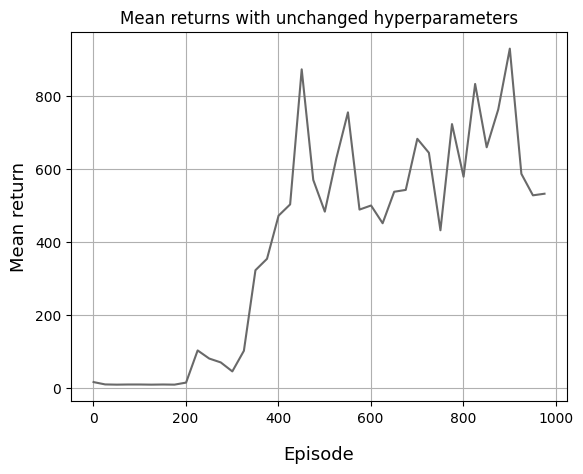

In [ ]:
import matplotlib.pyplot as plt

plt.plot(episodes, mean_returns, color="dimgray")
plt.title("Mean returns with unchanged hyperparameters")
plt.xlabel("Episode", fontsize=13, labelpad=15)
plt.ylabel("Mean return", fontsize=13, labelpad=5)
plt.grid()
plt.show()

# Running experiments with different hyperparameters 

In [ ]:
!python3 drive/MyDrive/RL-Project/train.py

Episode 1/1000: 9.2
Best performance so far! Saving model.
Episode 26/1000: 9.8
Best performance so far! Saving model.
Episode 51/1000: 9.2
Episode 76/1000: 9.2
Episode 101/1000: 9.2
Episode 126/1000: 9.4
Episode 151/1000: 9.0
Episode 176/1000: 9.8
Best performance so far! Saving model.
Episode 201/1000: 86.6
Best performance so far! Saving model.
Episode 226/1000: 54.4
Episode 251/1000: 63.6
Episode 276/1000: 50.2
Episode 301/1000: 64.2
Episode 326/1000: 87.4
Best performance so far! Saving model.
Episode 351/1000: 139.8
Best performance so far! Saving model.
Episode 376/1000: 88.6
Episode 401/1000: 87.6
Episode 426/1000: 124.0


# Storing results from different hyperparameter experiments, will use these to make a multiplot later for the report

For all experiments, we use the original hyperparameters as a baseline. We change one or a few of them at a time to see the differences.

In [ ]:
# batch_size = 10, target_update_frequency = 20
episodes1 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
means1 = [10.4, 9.6, 9.2, 9.2, 9.6, 9.4, 9.2, 9.4, 9.0, 9.2, 9.8, 8.6, 712.2, 38.4, 91.6, 68.8, 54.6, 61.2, 82.6, 52.4, 45.6, 69.8, 86.2, 148.6, 134.4, 293.0, 486.2, 239.2, 1852.0, 412.2, 451.8, 1059.6, 571.8, 1232.4, 740.2, 517.6, 402.6, 848.4, 397.0, 732.4]
assert len(episodes1) == len(means1)

# batch_size = 100, target_update_frequency = 250
episodes2 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
means2 = [28.0, 9.0, 9.0, 9.4, 9.2, 9.8, 14.0, 57.8, 54.2, 56.0, 82.2, 119.8, 778.0, 711.4, 369.6, 387.8, 464.4, 530.6, 373.4, 366.4, 437.6, 406.6, 430.0, 404.8, 395.4, 371.0, 336.8, 500.4, 346.0, 306.6, 331.6, 282.0, 271.6, 273.6, 292.2, 289.4, 246.2, 272.0, 261.0, 250.4]
assert len(episodes2) == len(means2)

# n_episodes = 1500 
episodes3 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976, 1001, 1026, 1051, 1076, 1101, 1126, 1151, 1176, 1201, 1226, 1251, 1276, 1301, 1326, 1351, 1376, 1401, 1426, 1451, 1476]
means3 = [9.6, 9.8, 9.8, 10.2, 9.4, 9.6, 9.8, 9.2, 9.4, 9.2, 37.4, 31.0, 53.8, 64.2, 44.0, 61.0, 67.2, 184.0, 105.2, 243.2, 625.2, 645.6, 308.4, 409.2, 444.2, 344.8, 308.0, 273.2, 277.6, 239.2, 256.6, 240.4, 220.2, 223.4, 216.8, 219.2, 207.4, 192.0, 194.4, 222.2, 230.6, 223.8, 242.2, 225.2, 235.0, 354.2, 227.4, 266.2, 285.2, 211.6, 223.8, 294.8, 246.0, 223.2, 238.8, 198.2, 239.6, 219.4, 240.4, 216.0]
assert len(episodes3) == len(means3)

# train_frequency = 2 (runs much faster than train_frequency = 1)
episodes4 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
means4 = [9.2, 9.4, 9.2, 9.2, 9.6, 9.2, 9.2, 9.0, 9.2, 9.2, 10.0, 9.6, 9.4, 11.2, 9.2, 9.4, 9.8, 102.6, 47.2, 47.6, 53.4, 51.2, 71.0, 65.2, 62.6, 50.4, 151.6, 108.8, 128.4, 96.0, 165.4, 391.2, 299.4, 276.0, 3087.4, 665.0, 1010.6, 1032.8, 704.0, 940.2]
assert len(episodes4) == len(means4)

# learning rate (lr) = 1e-3
episodes5 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
means5 = [9.6, 9.8, 67.2, 308.0, 171.8, 248.2, 262.8, 230.2, 222.8, 181.4, 200.0, 206.8, 205.0, 213.6, 243.8, 197.4, 211.8, 233.6, 151.2, 132.2, 161.2, 145.0, 154.4, 138.4, 179.6, 137.4, 120.6, 162.2, 124.8, 147.6, 128.8, 184.4, 107.6, 236.6, 167.2, 222.0, 125.0, 169.8, 119.2, 115.2]
assert len(episodes5) == len(means5)

# learning rate (lr) = 1e-5 (runs exremely fast, never improves)
episodes6 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
means6 = [8.4, 10.0, 10.0, 9.0, 9.2, 9.0, 9.2, 9.2, 9.0, 10.0, 9.8, 9.2, 8.8, 9.2, 9.4, 9.4, 9.4, 9.4, 9.8, 9.8, 9.6, 9.2, 9.4, 9.4, 10.0, 9.4, 9.2, 8.6, 9.2, 10.0, 9.4, 9.4, 9.8, 9.4, 9.8, 9.2, 9.4, 9.6, 9.4, 9.4]
assert len(episodes6) == len(means6)

# gamma = 0.999
episodes7 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
means7 = [9.2, 9.6, 8.8, 9.2, 9.6, 9.6, 9.2, 9.4, 10.0, 8.4, 11.4, 11.2, 9.8, 13.2, 31.6, 109.2, 50.8, 51.4, 78.6, 50.8, 47.4, 97.0, 152.6, 177.8, 361.2, 295.2, 426.8, 834.8, 2613.0, 1259.4, 445.2, 1846.2, 749.8, 138.6, 75.4, 64.6, 62.4, 97.0, 149.0, 242.2]
assert len(episodes7) == len(means7)

# gamma = 0.9
episodes8 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
means8 = [18.8, 8.8, 9.2, 8.6, 9.4, 9.2, 9.6, 37.2, 56.2, 47.2, 45.2, 76.8, 139.8, 262.4, 664.0, 442.6, 436.0, 348.4, 327.0, 321.0, 377.4, 269.8, 404.2, 443.2, 323.0, 412.0, 391.2, 334.2, 249.4, 346.2, 362.0, 267.4, 331.2, 312.0, 273.4, 290.0, 242.6, 205.8, 215.6, 187.8]
assert len(episodes8) == len(means8)

# memory_size = 5000
episodes9 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
means9 = [9.6, 9.4, 9.0, 9.6, 9.4, 9.2, 9.4, 11.0, 9.6, 9.6, 72.4, 33.0, 80.8, 38.6, 53.0, 39.0, 58.8, 77.6, 77.8, 72.4, 130.6, 203.2, 215.8, 121.0, 349.0, 192.6, 210.0, 305.0, 177.2, 161.0, 164.6, 157.0, 190.4, 230.2, 15.8, 20.0, 221.4, 106.4, 162.4, 167.8]
assert len(episodes9) == len(means9)



#Will probably discard anneal_length, not too interesting
# anneal_length = 10**3
#episodes9 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
#means9 = [10.0, 9.4, 8.8, 9.2, 9.4, 10.0, 9.6, 10.0, 9.6, 10.8, 11.4, 21.6, 9.8, 9.6, 9.6, 9.2, 9.4, 9.6, 169.2, 34.4, 42.0, 45.4, 62.4, 46.2, 70.4, 218.8, 97.4, 125.4, 177.6, 549.6, 318.6, 295.8, 307.8, 210.6, 275.6, 685.6, 476.8, 271.0, 190.4, 245.2]
#assert len(episodes9) == len(means9)

# anneal_length = 10**5
#episodes10 = [1, 26, 51, 76, 101, 126, 151, 176, 201, 226, 251, 276, 301, 326, 351, 376, 401, 426, 451, 476, 501, 526, 551, 576, 601, 626, 651, 676, 701, 726, 751, 776, 801, 826, 851, 876, 901, 926, 951, 976]
#means10 = [9.0, 10.0, 9.4, 9.4, 9.2, 9.2, 9.0, 9.0, 9.6, 11.8, 20.4, 64.4, 89.2, 59.0, 75.2, 38.4, 54.4, 67.2, 47.6, 63.2, 71.6, 96.2, 121.8, 86.4, 115.4, 73.6, 189.2, 171.2, 275.8, 133.4, 110.8, 427.0, 202.6, 164.4, 211.6, 219.8, 306.4, 303.0, 331.6, 317.8]
#assert len(episodes10) == len(means10)




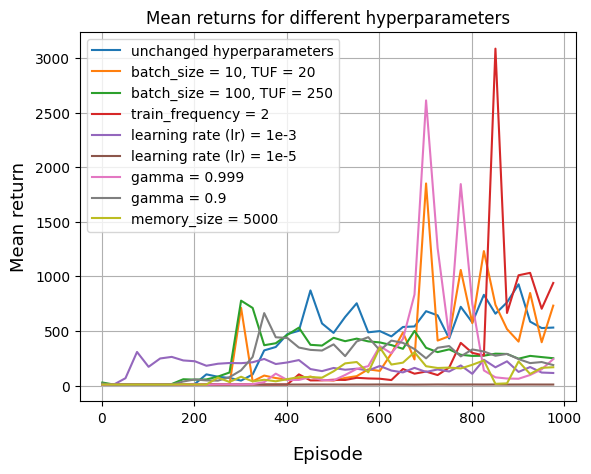

In [ ]:
plt.plot(episodes, mean_returns, label="unchanged hyperparameters")
plt.plot(episodes1, means1, label="batch_size = 10, TUF = 20")
plt.plot(episodes2, means2, label="batch_size = 100, TUF = 250")
#plt.plot(episodes3, means3, label="n_episodes = 1500")
plt.plot(episodes4, means4, label="train_frequency = 2")
plt.plot(episodes5, means5, label="learning rate (lr) = 1e-3")
plt.plot(episodes6, means6, label="learning rate (lr) = 1e-5")
plt.plot(episodes7, means7, label="gamma = 0.999")
plt.plot(episodes8, means8, label="gamma = 0.9")
plt.plot(episodes9, means9, label="memory_size = 5000")
plt.title("Mean returns for different hyperparameters")
plt.xlabel("Episode", fontsize=13, labelpad=15)
plt.ylabel("Mean return", fontsize=13, labelpad=5)
plt.grid()
plt.legend()
plt.show()

In [ ]:
import torch

In [ ]:
torch.randint(
            low=2, 
            high=4, 
            size=(10, 1)
          )

tensor([[2],
        [2],
        [2],
        [2],
        [3],
        [3],
        [2],
        [3],
        [2],
        [2]])

In [ ]:
!python3 drive/MyDrive/RL-Project/Atari/TEST.py

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
tensor([[-0.0438, -0.0355]], device='cuda:0', grad_fn=<AddmmBackward0>)
2
2
3
3
2
3
2
3
3
2
2
2
2
2
2
3
3
3
2
2
3
3
2
2
2


In [ ]:
!python3 drive/MyDrive/RL-Project/Atari/train.py

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
Episode 1/5000: -21.0
Best performance so far! Saving model.
Episode 26/5000: -21.0
Best performance so far! Saving model.
Episode 51/5000: -21.0
Best performance so far! Saving model.
Episode 76/5000: -21.0
Best performance so far! Saving model.
Episode 101/5000: -20.6
Best performance so far! Saving model.
Episode 126/5000: -21.0
Episode 151/5000: -20.6
Best performance so far! Saving model.
Episode 176/5000: -20.2
Best performance so far! Saving model.
Episode 201/5000: -19.0
Best performance so far! Saving model.
Episode 226/5000: -17.8
Best performance so far! Saving model.
Episode 251/5000: -19.8
Episode 276/5000: -17.6
Best performance so far! Saving model.
Episode 301/5000: -17.0
Best performance so far! Saving model.
Episode 326/5000: -14.8
Best performance so far! Saving model.
Episode 351/5000: -17.6
Episode 376/5000: -16.6
Episode 401/5000: -17.2
Episode 426/5000: -15.0
Episode 451/5000: -18.8
Ep

In [ ]:
!python3 drive/MyDrive/RL-Project/Atari/evaluate.py --path drive/MyDrive/RL-Project/models/ALE/Pong-v5_best.pt --save_video

A.L.E: Arcade Learning Environment (version 0.8.1+53f58b7)
[Powered by Stella]
/usr/local/lib/python3.9/dist-packages/gymnasium/wrappers/record_video.py:87: UserWarning: WARN: Overwriting existing videos at /content/drive/MyDrive/RL-Project/videos folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/usr/local/lib/python3.9/dist-packages/gymnasium/utils/passive_env_checker.py:364: UserWarning: WARN: No render fps was declared in the environment (env.metadata['render_fps'] is None or not defined), rendering may occur at inconsistent fps.
  logger.warn(
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:121: DeprecationWarning: pkg_resources is deprecated as an API
  warnings.warn("pkg_resources is deprecated as an API", DeprecationWarning)
/usr/local/lib/python3.9/dist-packages/pkg_resources/__init__.py:2870: DeprecationWarning: Deprecated call to `pkg_resources.declare_namespace('google')`.
Implementing imp